In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime

#### Merging 12 months sales data into a single cell

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

merged_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    merged_data = pd.concat([merged_data, df])
    
merged_data.to_csv("merged_data.csv", index=False)

#### Reading the updated dataframe

In [3]:
merged_data = pd.read_csv('merged_data.csv')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

##### Displaying cells/rows with nan values

In [5]:
nan_df = merged_data[merged_data.isnull().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
merged_data = merged_data.dropna(how='all')
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


#### Spliting the 'Order Date' column into Month and Time columns

In [7]:
# Convert 'Order Date' column from object to datetime
merged_data[ 'Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')
# Add a month column
merged_data.loc[:,'Month'] = merged_data['Order Date'].dt.month
#Add a time column
merged_data.loc[:,'Time'] = merged_data['Order Date'].dt.time
merged_data.head() 

/tmp/ipykernel_13294/3202776783.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data[ 'Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9.0,14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9.0,10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9.0,17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9.0,07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9.0,19:03:00


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Month             185950 non-null  float64       
 7   Time              185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.8+ MB


In [9]:
#checking nan value in the Month column created
nan_values = merged_data[merged_data['Month'].isna()]
nan_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
1679,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
3732,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
3790,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
4323,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
5579,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
...,...,...,...,...,...,...,...,...
183633,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
184671,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
184801,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
185398,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN


In [10]:
# Cleaning by removing the NaN & Natvalues from the month column
merged_data.dropna(subset=['Month'], inplace=True)

# Resetting the DataFrame index
merged_data.reset_index(drop=True, inplace=True)

In [11]:
# Confirming the contents of the specified row with indexing
df = merged_data.loc[merged_data.index == 3732]
print(df)

     Order ID                 Product Quantity Ordered Price Each  \
3732   251749  34in Ultrawide Monitor                1     379.99   

              Order Date                  Purchase Address  Month      Time  
3732 2019-09-15 13:25:00  512 Jackson St, Dallas, TX 75001    9.0  13:25:00  


In [12]:
# Dropping the row from the Merged dataframe
merged_data.drop(3732, inplace=True)

In [13]:
# Converting the Month column to an integer.  
merged_data[ 'Month'] = merged_data['Month'].astype('int32')

In [14]:
#Confirming the data types of the month and time columns
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  object        
 3   Price Each        185949 non-null  object        
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 12.1+ MB


### Data Exploration
Solving the main business questions related to the data
### Task A.  What was the best month of sales? How much was earned that month?

In [15]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00


##### Adding a sales column

In [16]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  object        
 3   Price Each        185949 non-null  object        
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 12.1+ MB


#### Converting Sales and Quantity ordered columns to the correct data types

In [17]:
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185949 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185949 non-null  object        
 1   Product           185949 non-null  object        
 2   Quantity Ordered  185949 non-null  int64         
 3   Price Each        185949 non-null  float64       
 4   Order Date        185949 non-null  datetime64[ns]
 5   Purchase Address  185949 non-null  object        
 6   Month             185949 non-null  int32         
 7   Time              185949 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


In [19]:
merged_data['Total sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99


In [20]:
# Checking the best month of sales & the amount earned in that month
#Task1: Groupby month

best_month = merged_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Total sales': 'sum'
}).reset_index()
best_month

,Month,Quantity Ordered,Total sales
0,1,10903,1822256.73
1,2,13449,2202022.42
2,3,17005,2807100.38
3,4,20558,3390670.24
4,5,18667,3152606.75
5,6,15253,2577802.26
6,7,16072,2647775.76
7,8,13448,2244467.88
8,9,13108,2097180.14
9,10,22703,3736726.88


In [21]:
# setting the best_month df in descending order
best_month.sort_values(by='Total sales', ascending=False)

,Month,Quantity Ordered,Total sales
11,12,28114,4613443.34
9,10,22703,3736726.88
3,4,20558,3390670.24
10,11,19798,3199603.20
4,5,18667,3152606.75
2,3,17005,2807100.38
6,7,16072,2647775.76
5,6,15253,2577802.26
7,8,13448,2244467.88
1,2,13449,2202022.42


#### Visualizing the Task A results

range(1, 13)


Text(0.5, 1.0, 'Sales by Month')

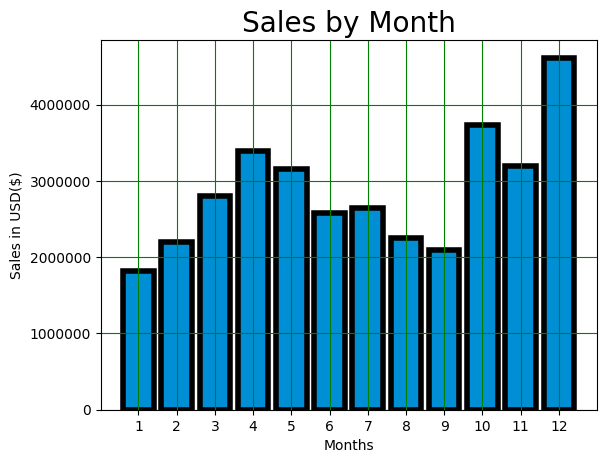

In [22]:
months = range(1,13)
print(months)
plt.bar(months, best_month['Total sales'], color="#008fd5", linewidth=4, edgecolor='black')
plt.xticks(months)

#removing scientific notation
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ticklabel_format(style='plain') 


plt.style.use('fivethirtyeight')
plt.grid(color= 'green', linestyle = '-')
plt.ylabel("Sales in USD($)")
plt.xlabel("Months")
plt.title('Sales by Month')


### Task A Results:  
#### What was the best month of sales? December 
#### How much was earned that month? $4613443.34

## Task B: What city sold the most product?

In [23]:
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99


### Steps
#### Step 1: Extract the location from the purchase address column and store the data in a new location column.
#### Step 2: Groupby and get the sum aggregate of the city column.
#### Step 3: Visualize the data to exhibit the city with the most sales.

In [24]:
# Step 1
merged_data['City'] = [x.split(',')[1] for x in merged_data['Purchase Address'].values]
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,Atlanta
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,Los Angeles
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,Portland
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,Los Angeles
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,New York City
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,San Francisco


In [25]:
merged_data['City'] = [x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1] for x in merged_data['Purchase Address'].values]
merged_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA"
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,"Los Angeles, CA"
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,"Portland, ME"
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,"Los Angeles, CA"
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,"New York City, NY"
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,"San Francisco, CA"


In [26]:
# Step 2 :grouping data by city and getting the sum column
df_results = merged_data.groupby('City')[['Quantity Ordered', 'Price Each','Month', 'Total sales']].sum()
df_results

,Quantity Ordered,Price Each,Month,Total sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16729,2752247.83,104611,2767595.41
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


Text(0.5, 1.0, 'Total Sales per City')

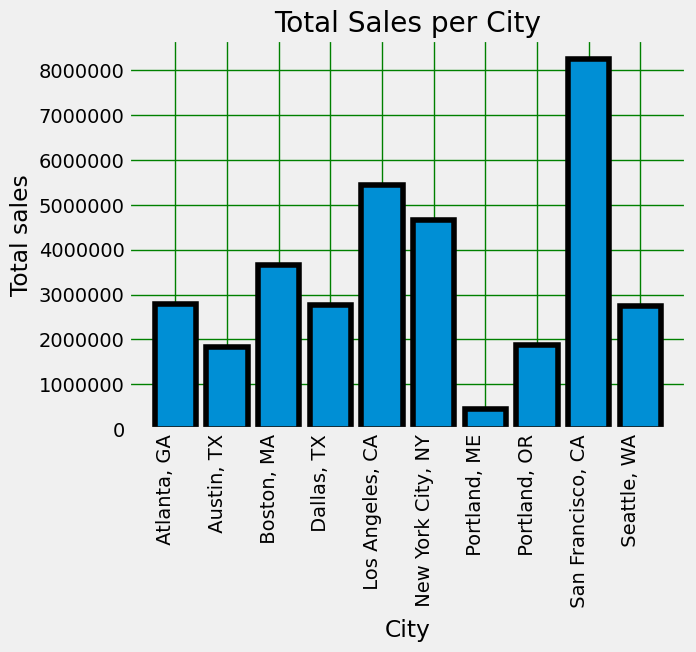

In [27]:
# Step 3 Visualizing 
Cities = df_results.index
Total_Sales = df_results['Total sales']
plt.bar(Cities, Total_Sales, color="#008fd5", linewidth=4, edgecolor='black')
plt.xticks(Cities, rotation=90, ha = 'right')

#plt.ticklabel_format(style='plain')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.style.use('fivethirtyeight')
plt.grid(color= 'green', linestyle = '-')
plt.xlabel('City')
plt.ylabel('Total sales')
plt.title('Total Sales per City')


In [28]:
#Create a stacked-barchart where each bar represents a city, and the segments within each bar represent the contribution of each month to the total sales for that city.

Text(0.5, 1.0, 'Distribution of Total Sales by City')

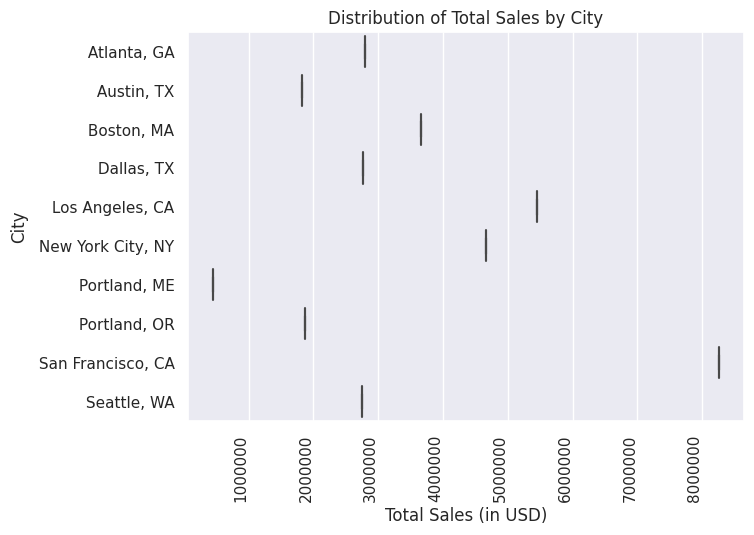

In [29]:
#Using boxplot to visualize the distribution of total sales between cities
sns.set(style="darkgrid")

Cities = df_results.index
Total_Sales = df_results['Total sales']
plot = sns.boxplot(data = df_results,x=Total_Sales, y=Cities, orient='h', )

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks( rotation=90, ha = 'right')

plt.xlabel('Total Sales (in USD)')
plt.ylabel('City')
plt.title('Distribution of Total Sales by City')

#### Task 3 Results: ( What city sold the most product?)
#### San Francisco, CA

### Task 4: What time should we display advertisements to maximize the likelihood of customer’s buying product?

#### Step 1: Extracting the hours from the Order Date column and placing it into an newly created 'Hour' column.
#### Step 2: Utilizing the "groupby" function to categorize and group the data based on the "hours" column.
#### Step 3: Create a visualization to exhibit which time periods are mostly utilized to make purchases


In [30]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA"


In [31]:
# Extracting the hours from the Order Date column into an 'Hour' column
merged_data.loc[:,'Hour'] = merged_data['Order Date'].dt.hour
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",19
...,...,...,...,...,...,...,...,...,...,...,...
185945,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001",1,19:09:00,109.99,"Dallas, TX",19
185946,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016",1,22:58:00,149.99,"San Francisco, CA",22
185947,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035",1,14:31:00,999.99,"Portland, OR",14
185948,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001",1,14:21:00,5.98,"Los Angeles, CA",14


In [32]:
merged_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0.5, 1.0, 'Purchases made in Approximated Time Periods')

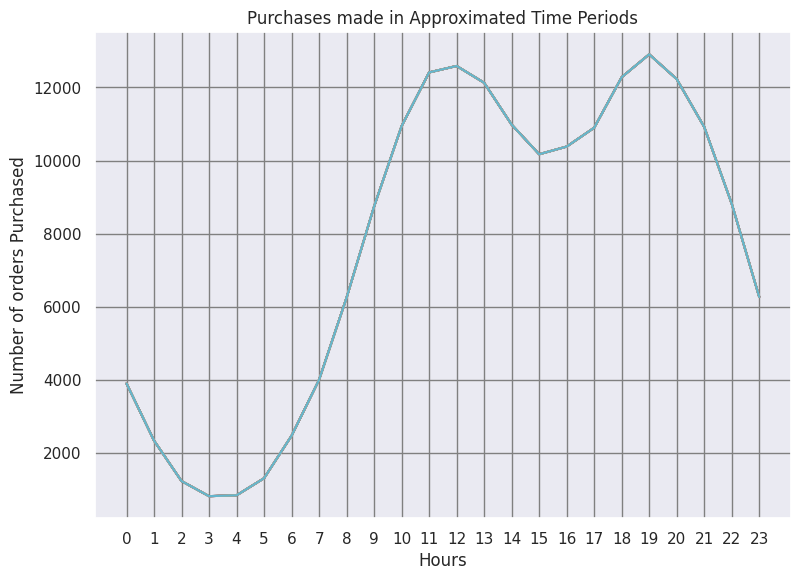

In [33]:
#Visualizing data using a linegraph

hours = [hour for hour, df in merged_data.groupby('Hour')]
plt.figure(figsize=(8,6))
plt.plot(hours, merged_data.groupby(['Hour']).count())
plt.xticks(hours)

plt.grid(True, color='grey')
plt.xlabel('Hours')
plt.ylabel('Number of orders Purchased')
plt.title('Purchases made in Approximated Time Periods')

### Visual interprentation
#### The graph illustrates that the time intervals from 11 a.m. to 1 p.m. and from 6 p.m. to 8 p.m. are the predominant choices among a majority of clients. Consequently, it is advisable for the business to concentrate its advertising efforts predominantly within these time frames.

### Task 4: What products are most often sold together?

#### Step 1: Let's check which products are ordered together using the order id. Same order id means purcharce items were ordered by the same client 

In [34]:
merged_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",19
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,14:59:00,379.99,"Los Angeles, CA",14
6,248157,Lightning Charging Cable,1,14.95,2019-09-07 09:59:00,"773 Johnson St, Portland, ME 04101",9,09:59:00,14.95,"Portland, ME",9
7,248158,Lightning Charging Cable,1,14.95,2019-09-02 14:16:00,"682 Sunset St, Los Angeles, CA 90001",9,14:16:00,14.95,"Los Angeles, CA",14
8,248159,Vareebadd Phone,1,400.00,2019-09-06 16:45:00,"664 Wilson St, New York City, NY 10001",9,16:45:00,400.00,"New York City, NY",16
9,248160,Wired Headphones,1,11.99,2019-09-01 22:03:00,"446 9th St, San Francisco, CA 94016",9,22:03:00,11.99,"San Francisco, CA",22


In [35]:
df = merged_data[merged_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,15:06:00,11.95,"New York City, NY",15
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,15:06:00,11.95,"New York City, NY",15
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,10:33:00,700.00,"San Francisco, CA",10
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,10:33:00,14.95,"San Francisco, CA",10
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,12:48:00,99.99,"Los Angeles, CA",12
71,248219,Google Phone,1,600.00,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,12:48:00,600.00,"Los Angeles, CA",12
117,248265,Vareebadd Phone,1,400.00,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,14:07:00,400.00,"San Francisco, CA",14
118,248265,Bose SoundSport Headphones,1,99.99,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,14:07:00,99.99,"San Francisco, CA",14
176,248323,Google Phone,1,600.00,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,20:36:00,600.00,"Portland, OR",20
177,248323,Bose SoundSport Headphones,1,99.99,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,20:36:00,99.99,"Portland, OR",20


In [39]:
df.loc[:, 'Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,15:06:00,11.95,"New York City, NY",15,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,15:06:00,11.95,"New York City, NY",15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,10:33:00,700.00,"San Francisco, CA",10,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,10:33:00,14.95,"San Francisco, CA",10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,12:48:00,99.99,"Los Angeles, CA",12,"Bose SoundSport Headphones,Google Phone"
71,248219,Google Phone,1,600.00,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,12:48:00,600.00,"Los Angeles, CA",12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.00,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,14:07:00,400.00,"San Francisco, CA",14,"Vareebadd Phone,Bose SoundSport Headphones"
118,248265,Bose SoundSport Headphones,1,99.99,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,14:07:00,99.99,"San Francisco, CA",14,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,Google Phone,1,600.00,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,20:36:00,600.00,"Portland, OR",20,"Google Phone,Bose SoundSport Headphones"
177,248323,Bose SoundSport Headphones,1,99.99,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,20:36:00,99.99,"Portland, OR",20,"Google Phone,Bose SoundSport Headphones"


In [40]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


### Task 4: Results: Printing out the products that are most often sold together from the highest to lowest pair. 

In [74]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))


# creating a 'keay_value_pairs' list from the key and value pairs
key_value_pairs = [(key,value) for key,value in count.most_common(10)]

print(key_value_pairs)

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


### Visualization: Placing the values back to a dataframe for visualization

In [75]:
df_pair = pd.DataFrame(key_value_pairs, columns=['Product Combination', 'Count'])
df_pair

,Product Combination,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


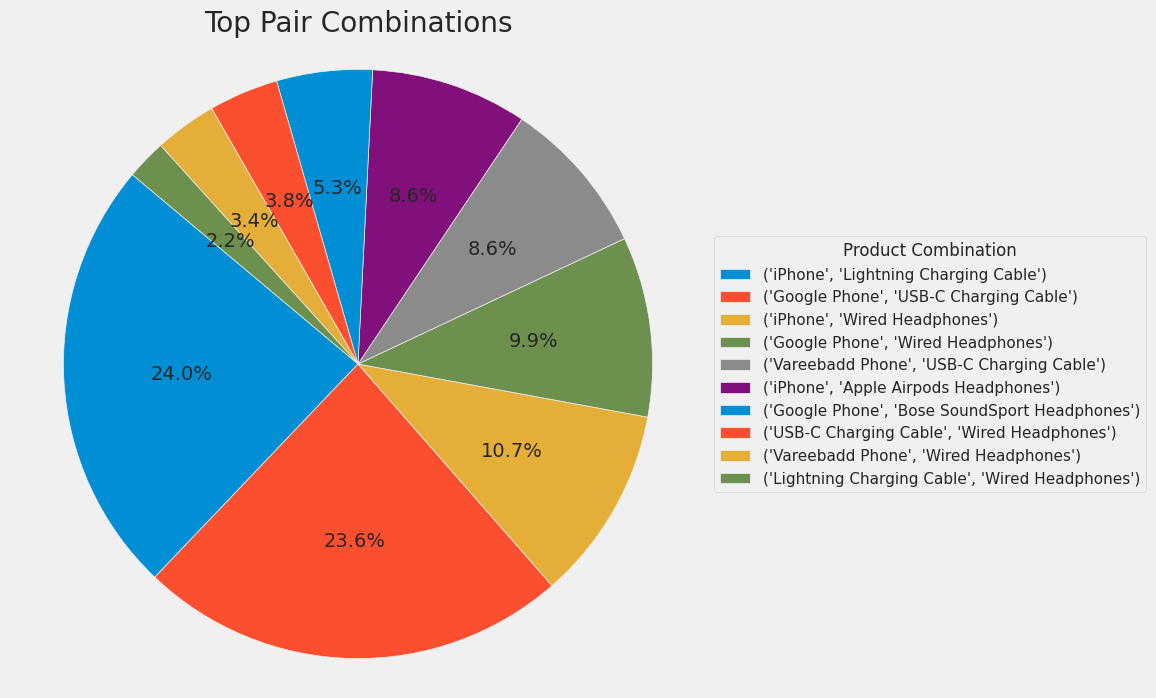

In [79]:
legend_labels = df_pair['Product Combination']

plt.figure(figsize=(8, 8))
plt.pie(df_pair['Count'], labels=['' for _ in legend_labels], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top Pair Combinations')
plt.legend(legend_labels, title='Product Combination', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Task 5: What product sold the most? Why do you think it sold the most? 
### Question 1: What product sold the most?

In [81]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",19


In [96]:
#Grouping by the product
Product_sold = merged_data.groupby('Product')[['Quantity Ordered', 'Price Each','Month', 'Total sales','Hour']].sum()
Product_sold

,Quantity Ordered,Price Each,Month,Total sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6198,2348338.20,43295,2355178.02,89063
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [97]:
# Getting the overall sum of the columns
Product_sold.sum()

Quantity Ordered      209078.00
Price Each          34288750.69
Month                1312638.00
Total sales         34491655.98
Hour                 2680141.00
dtype: float64

Text(0.5, 1.0, 'Total Quantity Ordered per Product')

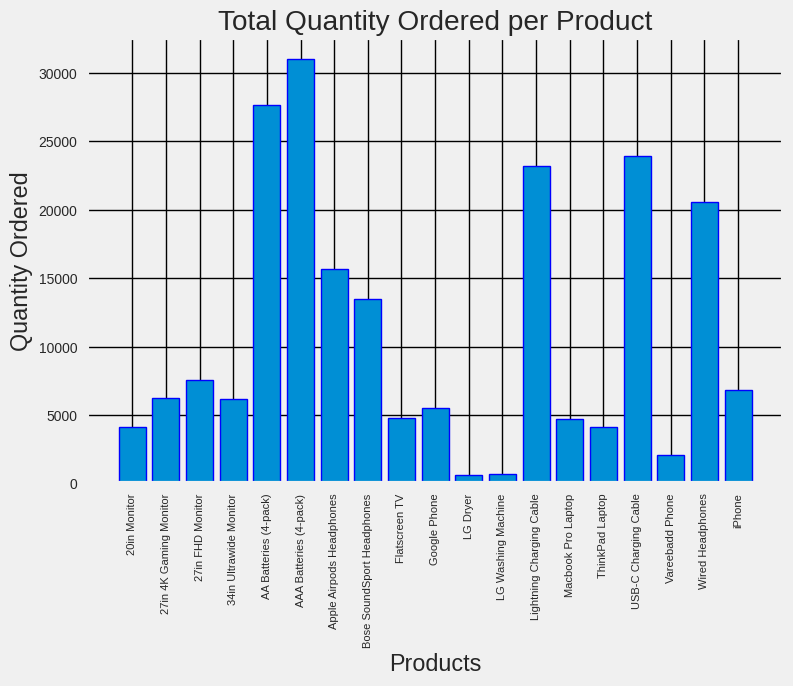

In [147]:
Product_sold = merged_data.groupby('Product')
quantity_ordered = Product_sold['Quantity Ordered'].sum()

keys = [pair for pair, df in Product_sold]
plt.bar(keys, quantity_ordered, color="#008fd5", linewidth=1, edgecolor='blue')
plt.xticks(keys, rotation='vertical', size=8)

plt.style.use('fivethirtyeight')
plt.grid(color ='black')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Total Quantity Ordered per Product')

### Question 1 Results: AAA Batteries (4-pack) product sold the most

#### Question 2: Why do you think it sold the most?
#### The best approcah to answer this is by first checking the prices of each product since prices have a significant purchasing influence. 

In [117]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Total sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,14:44:00,15.36,"Los Angeles, CA",14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,10:19:00,23.90,"Austin, TX",10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,17:48:00,11.95,"Los Angeles, CA",17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,07:52:00,149.99,"Seattle, WA",7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,19:03:00,11.95,"Atlanta, GA",19


In [125]:
# Checking the prices of the products

Price = merged_data.groupby('Price Each')[['Product', 'Quantity Ordered', 'Total sales', 'Hour']]
Price.sum()

,Product,Quantity Ordered,Total sales,Hour
Price Each,,,,
2.99,AAA Batteries (4-pack)AAA Batteries (4-pack)AA...,31017,92740.83,297332
3.84,AA Batteries (4-pack)AA Batteries (4-pack)AA B...,27635,106118.40,298342
11.95,USB-C Charging CableUSB-C Charging CableUSB-C ...,23975,286501.25,314645
11.99,Wired HeadphonesWired HeadphonesWired Headphon...,20557,246478.43,271720
14.95,Lightning Charging CableLightning Charging Cab...,23217,347094.15,312529
99.99,Bose SoundSport HeadphonesBose SoundSport Head...,13457,1345565.43,192445
109.99,20in Monitor20in Monitor20in Monitor20in Monit...,4129,454148.71,58764
149.99,27in FHD Monitor27in FHD Monitor27in FHD Monit...,7550,1132424.50,107540
150.00,Apple Airpods HeadphonesApple Airpods Headphon...,15661,2349150.00,223304


In [132]:
# checking the average prices for the products
price_mean = merged_data.groupby('Product')['Price Each'].mean()
price_mean

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### Visualizing the Results

/tmp/ipykernel_13294/4147375783.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/tmp/ipykernel_13294/4147375783.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


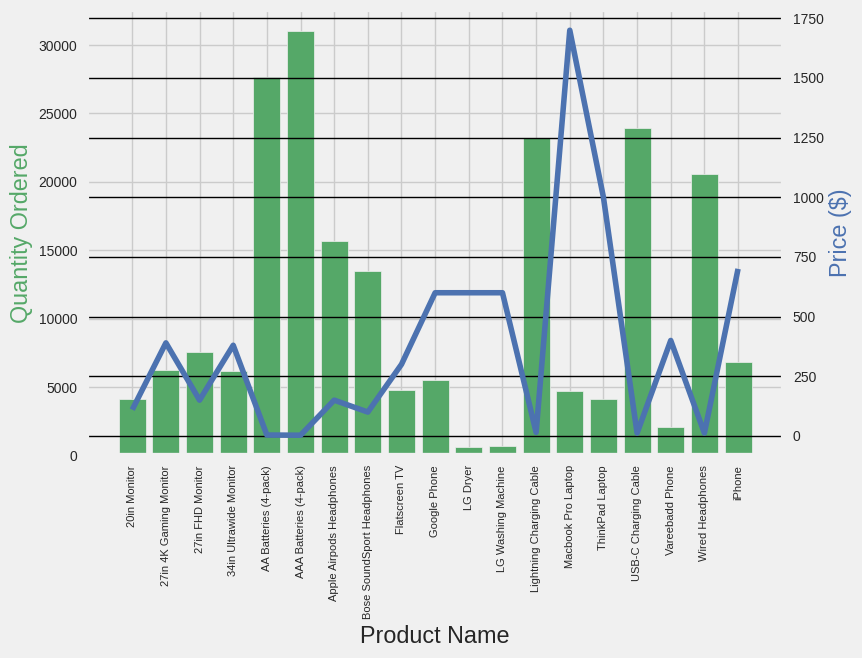

In [162]:
# Adding a secondary y-axis to an existing barchart 


price_mean = merged_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(keys, quantity_ordered, color= 'g')
ax2.plot(keys, price_mean, color='b')



plt.style.use('fivethirtyeight')
plt.grid(color ='black')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
fig.show()

### Results Conslusion  : Based on the provided results, pricing has a significant influence on product sales. In this case, the product with the lowest price, namely "AAA Batteries (4-pack)," exhibits the highest sales volume.